In [3]:
import scanpy as sc
import os
import matplotlib.pyplot as plt
import json
# import numpy as np
import pandas as pd
# import dask.array as da

genes = ['CCL21', 'SLC9A3','SPP1',"IL18","NBAS","SLC9A3","TIMP2","IGFBP7",
              "SUGP1","MMP9","ITGAM","TFF3","B2M","S100A6","IL10",'IL6',"CXCL8",
              "LCN2","HAVCR1","CST3","CCL2","FABP1"]
cell_types = [
    "endothelial cell", "epithelial cell of proximal tubule",
    "kidney collecting duct intercalated cell", "kidney collecting duct principal cell",
    "kidney connecting tubule epithelial cell", "kidney distal convoluted tubule epithelial cell",
    "kidney interstitial fibroblast", "kidney loop of Henle thick ascending limb epithelial cell",
    "kidney loop of Henle thin ascending limb epithelial cell", "kidney loop of Henle thin descending limb epithelial cell",
    "leukocyte", "neural cell", "papillary tips cell", "parietal epithelial cell",
    "podocyte", "renal interstitial pericyte","Schwann cell"
]
os.makedirs('HubMap-filtered-data', exist_ok=True)
with open('HubMap-filtered-data/common_cell_across_KPMP_HubMap.json',"r") as jf:
    common_KPMP_HubMap_data=json.load(jf)

common_KPMP_HubMap_data["common_cell"].append("Schwann cell")

In [24]:
adata = sc.read_h5ad('hubmap-LK-processed.h5ad', backed='r')

In [3]:
cell_mask = adata.obs['predicted_label'].isin(common_KPMP_HubMap_data["common_cell"])
filtered_adata = adata[cell_mask].to_memory()

In [4]:
filtered_adata.write("HubMap-filtered-data/filtered-HubMap-LK-celltype-only.h5ad")

In [11]:
cellFilteredData = sc.read_h5ad('HubMap-filtered-data/filtered-HubMap-LK-celltype-only.h5ad', backed='r')

In [12]:
gene_mask = cellFilteredData[:, cellFilteredData.var['hugo_symbol'].isin(genes)] 

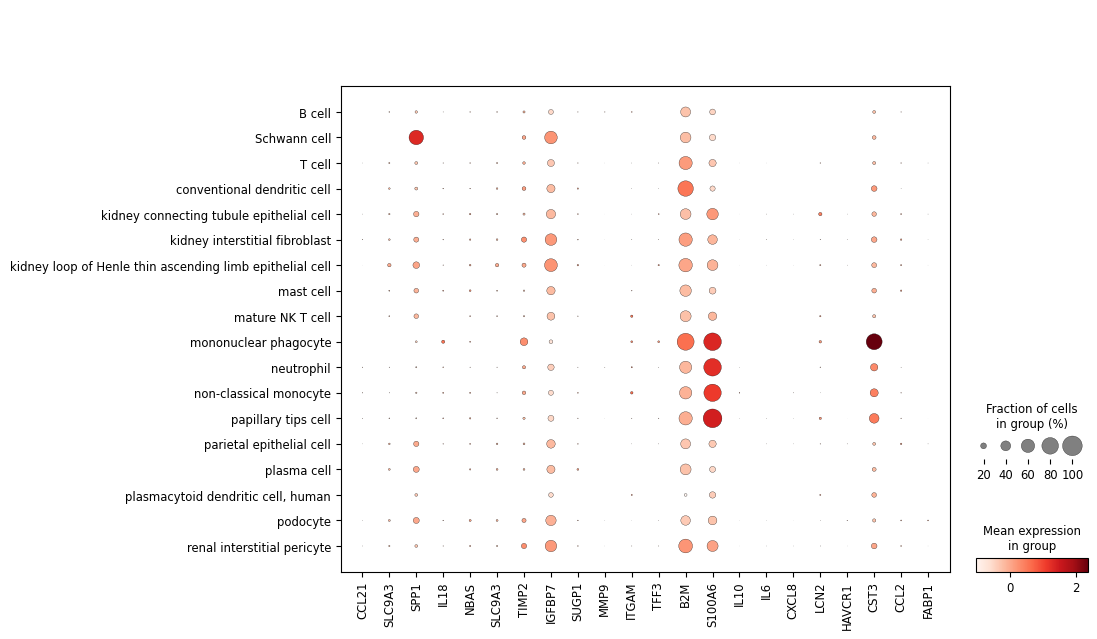

In [13]:
sc.pl.dotplot(gene_mask, genes, groupby='predicted_label', gene_symbols='hugo_symbol', show=True)
plt.show()

In [25]:
existing_cell_types = set(gene_mask.obs['predicted_label'].unique())
missing_cell_types = [cell for cell in cell_types if cell not in existing_cell_types]

if missing_cell_types:
    print("The following cell types are missing from adata:")
    for cell in missing_cell_types:
        print(cell)
else:
    print("All cell types exist in adata.")

The following cell types are missing from adata:
endothelial cell
epithelial cell of proximal tubule
kidney collecting duct intercalated cell
kidney collecting duct principal cell
kidney distal convoluted tubule epithelial cell
kidney loop of Henle thick ascending limb epithelial cell
kidney loop of Henle thin descending limb epithelial cell
leukocyte
neural cell
Schwann cell


In [25]:
adata1 = sc.read_h5ad('hubmap-RK-processed.h5ad', backed='r')

In [ ]:
cell_mask1 = adata1.obs['predicted_label'].isin(common_KPMP_HubMap_data["common_cell"])
filtered_adata1 = adata1[cell_mask1].to_memory()

In [7]:
filtered_adata1.write("HubMap-filtered-data/filtered-HubMap-RK-celltype-only.h5ad")

In [14]:
cellFilteredData1 = sc.read_h5ad('HubMap-filtered-data/filtered-HubMap-RK-celltype-only.h5ad', backed='r')
gene_mask1 = cellFilteredData1[:, cellFilteredData1.var['hugo_symbol'].isin(genes)]


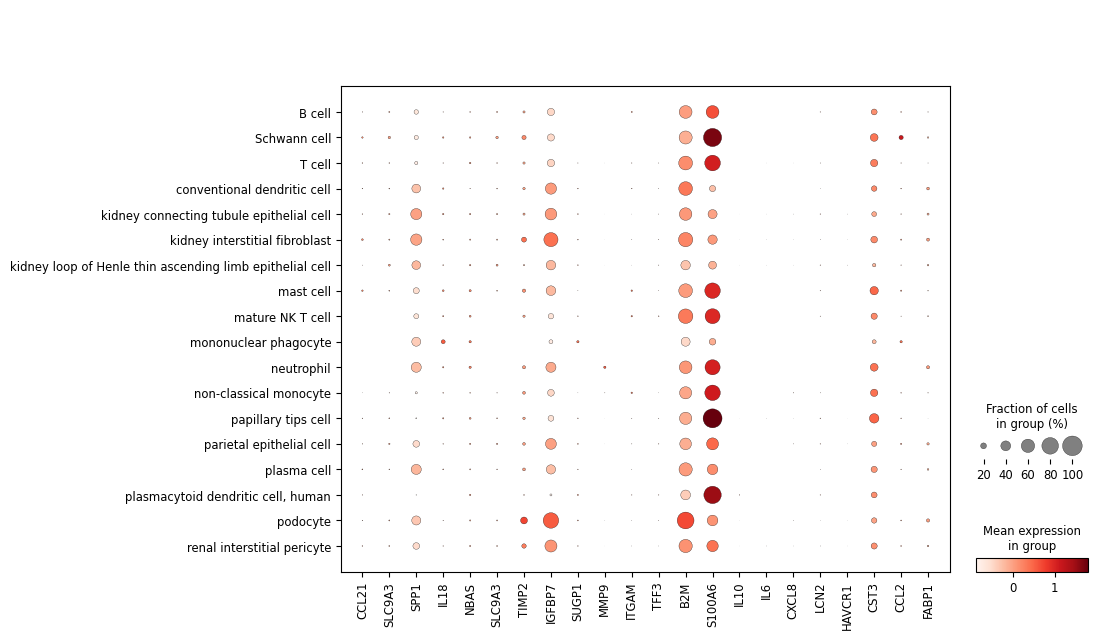

In [ ]:
sc.pl.dotplot(gene_mask1, genes, groupby='predicted_label', gene_symbols='hugo_symbol', show=True)
plt.show()

In [10]:
adata_KPMP=sc.read('kpmp-sn-rnaseq.h5ad',backed='r')

In [18]:
KPMP_cell=adata_KPMP.obs["cell_type"].isin(common_KPMP_HubMap_data["common_cell"])
filtered_adata2 = adata_KPMP[KPMP_cell].to_memory()
filtered_adata2.write("HubMap-filtered-data/filtered-KPMP-SN-celltype-only.h5ad")

In [4]:
cellFilteredData_KPMP = sc.read_h5ad('HubMap-filtered-data/filtered-KPMP-SN-celltype-only.h5ad', backed='r')

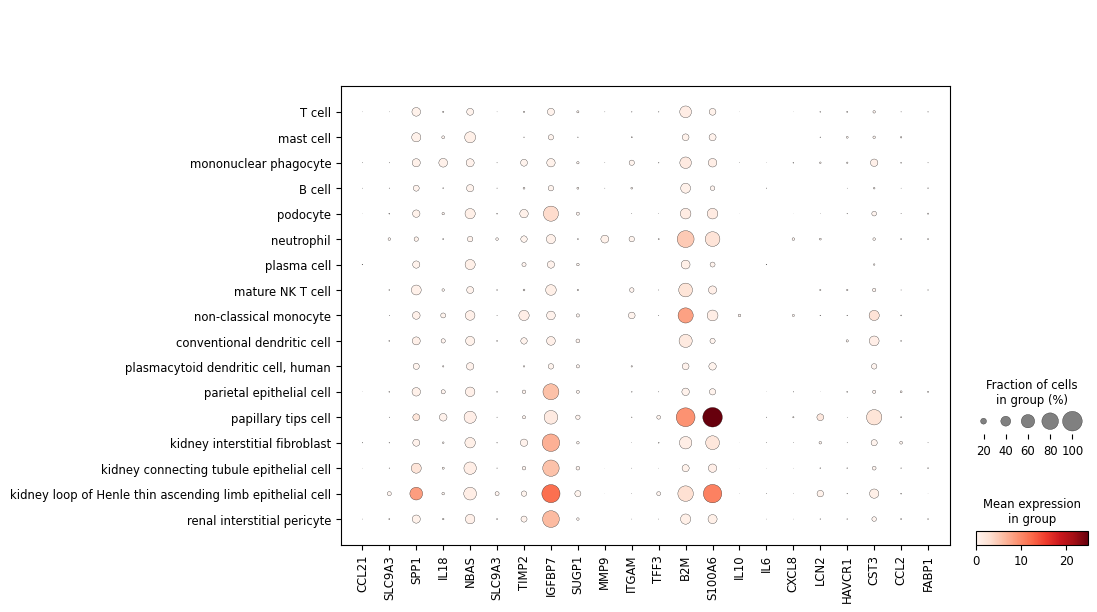

In [5]:
normal_data=cellFilteredData_KPMP.obs["disease"]=="normal"
normal_data_adata=cellFilteredData_KPMP[normal_data].to_memory()
gene_mask2 = normal_data_adata[:, normal_data_adata.var['feature_name'].isin(genes)]
dp = sc.pl.dotplot(
    gene_mask2, 
    genes, 
    groupby='cell_type', 
    gene_symbols='feature_name', 
    show=False
)
plt.show()

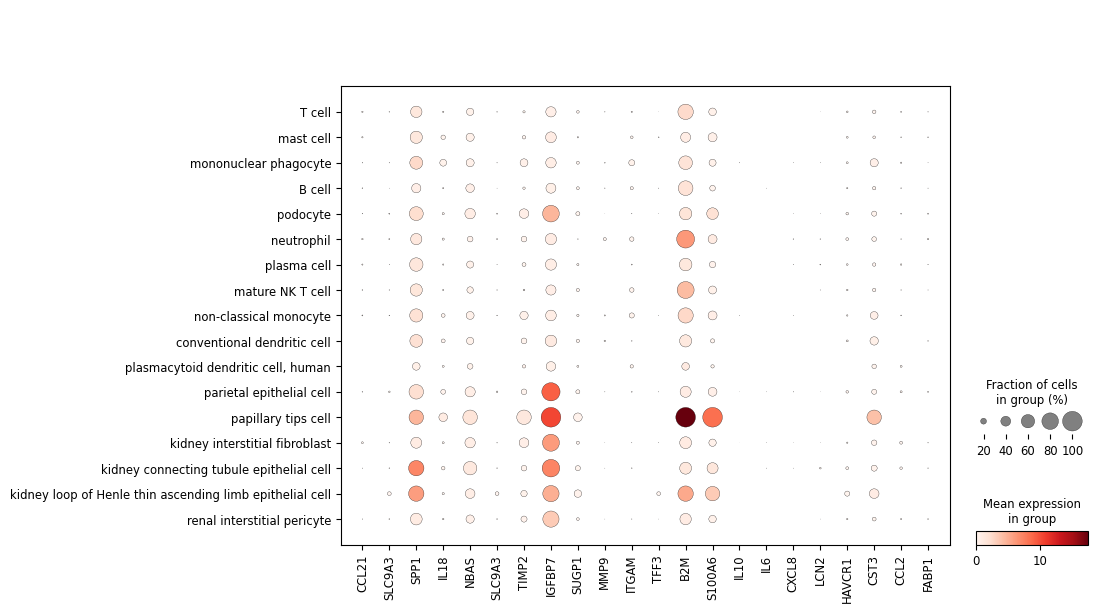

In [12]:
AKI_data=cellFilteredData_KPMP.obs["disease"]=="acute kidney failure"
AKI_data_adata=cellFilteredData_KPMP[AKI_data].to_memory()
gene_mask_AKI = AKI_data_adata[:, AKI_data_adata.var['feature_name'].isin(genes)]
dp = sc.pl.dotplot(
    gene_mask_AKI, 
    genes, 
    groupby='cell_type', 
    gene_symbols='feature_name', 
    show=False
)
plt.show()

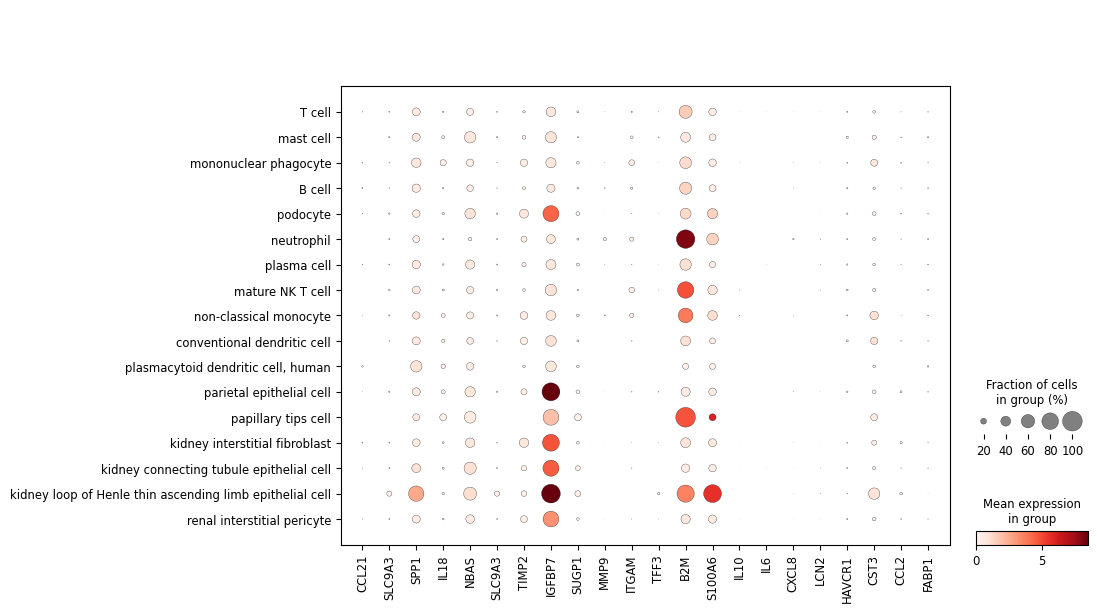

In [13]:
CKD_data=cellFilteredData_KPMP.obs["disease"]=="chronic kidney disease"
CKD_data_adata=cellFilteredData_KPMP[CKD_data].to_memory()
gene_mask_CKD = CKD_data_adata[:, CKD_data_adata.var['feature_name'].isin(genes)]
dp = sc.pl.dotplot(
    gene_mask_CKD, 
    genes, 
    groupby='cell_type', 
    gene_symbols='feature_name', 
    show=False
)
plt.show()

In [33]:
existing_cell_types = set(gene_mask1.obs['predicted_label'].unique())
missing_cell_types = [cell for cell in cell_types if cell not in existing_cell_types]

if missing_cell_types:
    print("The following cell types are missing from adata:")
    for cell in missing_cell_types:
        print(cell)
else:
    print("All cell types exist in adata.")

The following cell types are missing from adata:
endothelial cell
epithelial cell of proximal tubule
kidney collecting duct intercalated cell
kidney collecting duct principal cell
kidney distal convoluted tubule epithelial cell
kidney loop of Henle thick ascending limb epithelial cell
kidney loop of Henle thin descending limb epithelial cell
leukocyte
neural cell


In [49]:
def gene_and_cell_checker(params):
 schwann_cells = adata.obs[params['cell']['label']] == params['cell']['cell']
 schwann_cells_data=adata[schwann_cells].to_memory()
 SSP1_schwann_cells = schwann_cells_data[:, schwann_cells_data.var[params['gene']['label']]==params['gene']['gene']]
 print(SSP1_schwann_cells.obs[params["var"]].unique)

In [ ]:
params_for_func={
 'cell':{
  'label':'cause_of_death',
  'cell':'Anoxia'
  },
  'gene':{
   'label':'hugo_symbol',
   'gene':'SPP1'
  },
  'var':'predicted_label'
}
gene_and_cell_checker(params_for_func)

In [26]:
kpmp_sn=sc.read('kpmp-sn-rnaseq.h5ad',backed='r')

In [32]:
LK_cell=set(adata.obs["predicted_label"].unique())
RK_cell=set(adata1.obs["predicted_label"].unique())
kpmp_cncell=set(kpmp_sn.obs["cell_type"].unique())
common_cell=list( kpmp_cncell.intersection(LK_cell,RK_cell))
LK_gene=set(adata.var["hugo_symbol"].unique())
RK_gene=set(adata1.var["hugo_symbol"].unique())
kpmp_cngene=set(kpmp_sn.var["feature_name"].unique())
common_gene=list( kpmp_cngene.intersection(LK_gene,RK_gene))
data={
    'common_cell':common_cell,
    'common_gene':common_gene
}
with open("HubMap-filtered-data/common_cell_across_KPMP_HubMap.json","w") as f:
    json.dump(data,f)

In [34]:
print(f"number of shared gene between KPMP and hubMap: {len(list(common_KPMP_HubMap_data['common_gene']))}")
print(f"number of cell in HUBMAP RK: {len(adata1.obs['predicted_label'].unique())}")
print(f"number of cell in HUBMAP LK: {len(adata.obs['predicted_label'].unique())}")
print(f"number of cell in KPMP SN: {len(kpmp_sn.obs['cell_type'].unique())}")
print(f"number of shared cell between KPMP and hubMap: {len(list(common_KPMP_HubMap_data['common_cell']))}")
print(f"number of used shared gene between KPMP and hubMap: {len(genes)}")



number of shared gene between KPMP and hubMap: 22301
number of cell in HUBMAP RK: 48
number of cell in HUBMAP LK: 48
number of cell in KPMP SN: 26
number of shared cell between KPMP and hubMap: 18
number of used shared gene between KPMP and hubMap: 22
